# Estimation de la latence et de la capacité d’une connexion à partir de mesures asymétriques

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek
import gzip
import re as re
from sklearn.linear_model import LinearRegression


## Importation des données

Deux jeux de données proviennent de connexions  internet, permettent d'estimer la  latence et la capacité associées. Une copie locale des  données  est effectuée.

In [2]:
data_url_1="http://mescal.imag.fr/membres/arnaud.legrand/teaching/2014/RICM4_EP_ping/liglab2.log.gz"
data_url_2="http://mescal.imag.fr/membres/arnaud.legrand/teaching/2014/RICM4_EP_ping/stackoverflow.log.gz"

data_file_1_gz = "connexion_internet_1.gz"
data_file_2_gz = "connexion_internet_2.gz"

import os
import urllib.request
if not os.path.exists(data_file_1_gz):
    urllib.request.urlretrieve(data_url_1, data_file_1_gz)
    
if not os.path.exists(data_file_2_gz):
    urllib.request.urlretrieve(data_url_2, data_file_2_gz)
    

### Data set 1

In [3]:
with gzip.open(data_file_1_gz) as f:
    file_content = f.read()
f = open("data_file_1.txt", "w")
f.write(file_content.decode("utf-8") )
f.close()


In [4]:
raw_data_1 = pd.read_csv("data_file_1.txt",sep=' ',header=None)
raw_data_1

0     1      2     3                   4  \
0      [1421761682.052172]   665  bytes  from  lig-publig.imag.fr   
1      [1421761682.277315]  1373  bytes  from  lig-publig.imag.fr   
2      [1421761682.502054]   262  bytes  from  lig-publig.imag.fr   
3      [1421761682.729257]  1107  bytes  from  lig-publig.imag.fr   
4      [1421761682.934648]  1128  bytes  from  lig-publig.imag.fr   
5      [1421761683.160397]   489  bytes  from  lig-publig.imag.fr   
6      [1421761683.443055]  1759  bytes  from  lig-publig.imag.fr   
7      [1421761683.672157]  1146  bytes  from  lig-publig.imag.fr   
8      [1421761683.899933]   884  bytes  from  lig-publig.imag.fr   
9      [1421761684.122687]  1422  bytes  from  lig-publig.imag.fr   
10     [1421761684.344135]  1180  bytes  from  lig-publig.imag.fr   
11     [1421761684.566271]   999  bytes  from  lig-publig.imag.fr   
12     [1421761684.770828]    21  bytes  from  lig-publig.imag.fr   
13     [1421761684.998504]  1020  bytes  from  lig-publig.imag.fr   
14     [1421761685.205172]    71  bytes  from  lig-publig.imag.fr   
15     [1421761685.414106]    34  bytes  from  lig-publig.imag.fr   
16     [1421761685.620117]  1843  bytes  from  lig-publig.imag.fr   
17     [1421761685.824949]   407  bytes  from  lig-publig.imag.fr   
18     [1421761686.029177]   356  bytes  from  lig-publig.imag.fr   
19     [1421761686.234464]  1511  bytes  from  lig-publig.imag.fr   
20     [1421761686.438772]   587  bytes  from  lig-publig.imag.fr   
21     [1421761686.643208]   809  bytes  from  lig-publig.imag.fr   
22     [1421761686.848323]  1364  bytes  from  lig-publig.imag.fr   
23     [1421761687.053400]  1153  bytes  from  lig-publig.imag.fr   
24     [1421761687.257704]   853  bytes  from  lig-publig.imag.fr   
25     [1421761687.463275]  1510  bytes  from  lig-publig.imag.fr   
26     [1421761687.668423]   123  bytes  from  lig-publig.imag.fr   
27     [1421761687.874230]  1966  bytes  from  lig-publig.imag.fr   
28     [1421761688.078667]   933  bytes  from  lig-publig.imag.fr   
29     [1421761688.283655]   922  bytes  from  lig-publig.imag.fr   
...                    ...   ...    ...   ...                 ...   
44383  [1421771180.743715]  1772  bytes  from  lig-publig.imag.fr   
44384  [1421771180.949053]    41  bytes  from  lig-publig.imag.fr   
44385  [1421771181.155685]  1944  bytes  from  lig-publig.imag.fr   
44386  [1421771181.362095]   400  bytes  from  lig-publig.imag.fr   
44387  [1421771181.569409]   226  bytes  from  lig-publig.imag.fr   
44388  [1421771181.780805]   466  bytes  from  lig-publig.imag.fr   
44389  [1421771181.998869]   350  bytes  from  lig-publig.imag.fr   
44390  [1421771182.248969]  1829  bytes  from  lig-publig.imag.fr   
44391  [1421771182.512386]  1954  bytes  from  lig-publig.imag.fr   
44392  [1421771182.717961]  1074  bytes  from  lig-publig.imag.fr   
44393  [1421771182.923292]    46  bytes  from  lig-publig.imag.fr   
44394  [1421771183.129965]  1844  bytes  from  lig-publig.imag.fr   
44395  [1421771183.335449]   645  bytes  from  lig-publig.imag.fr   
44396  [1421771183.540901]   444  bytes  from  lig-publig.imag.fr   
44397  [1421771183.747983]  1940  bytes  from  lig-publig.imag.fr   
44398  [1421771183.954099]  1411  bytes  from  lig-publig.imag.fr   
44399  [1421771184.159879]    49  bytes  from  lig-publig.imag.fr   
44400  [1421771184.365815]   420  bytes  from  lig-publig.imag.fr   
44401  [1421771184.571516]   227  bytes  from  lig-publig.imag.fr   
44402  [1421771184.777325]   947  bytes  from  lig-publig.imag.fr   
44403  [1421771184.983905]  1960  bytes  from  lig-publig.imag.fr   
44404  [1421771185.188976]   531  bytes  from  lig-publig.imag.fr   
44405  [1421771185.394275]   374  bytes  from  lig-publig.imag.fr   
44406  [1421771185.600745]  1503  bytes  from  lig-publig.imag.fr   
44407  [1421771185.805877]   572  bytes  from  lig-publig.imag.fr   
44408  [1421771186.011910]  1338  bytes  from  lig-publig.imag.fr   
44409  [1421771186.2227

On repère les lignes où les données sont incomplètes

In [5]:
raw_data_1[raw_data_1.isnull().any(axis=1)]

0   1      2     3                   4  \
12     [1421761684.770828]  21  bytes  from  lig-publig.imag.fr   
116    [1421761706.146320]   9  bytes  from  lig-publig.imag.fr   
314    [1421761748.647974]   9  bytes  from  lig-publig.imag.fr   
508    [1421761788.500516]   9  bytes  from  lig-publig.imag.fr   
590    [1421761805.331125]  18  bytes  from  lig-publig.imag.fr   
647    [1421761817.308839]  18  bytes  from  lig-publig.imag.fr   
1087   [1421761907.694059]  18  bytes  from  lig-publig.imag.fr   
1091   [1421761908.512826]  13  bytes  from  lig-publig.imag.fr   
1131   [1421761916.713419]  20  bytes  from  lig-publig.imag.fr   
1153   [1421761921.229704]  21  bytes  from  lig-publig.imag.fr   
1350   [1421761962.174859]  15  bytes  from  lig-publig.imag.fr   
1542   [1421762001.590195]  17  bytes  from  lig-publig.imag.fr   
1691   [1421762032.199394]  19  bytes  from  lig-publig.imag.fr   
1765   [1421762047.397821]   9  bytes  from  lig-publig.imag.fr   
1957   [1421762088.369820]  21  bytes  from  lig-publig.imag.fr   
2099   [1421762117.516869]   8  bytes  from  lig-publig.imag.fr   
2182   [1421762134.551193]  23  bytes  from  lig-publig.imag.fr   
2209   [1421762140.101009]  10  bytes  from  lig-publig.imag.fr   
2455   [1421762191.278531]  21  bytes  from  lig-publig.imag.fr   
2478   [1421762196.022695]  16  bytes  from  lig-publig.imag.fr   
2722   [1421762246.169992]  19  bytes  from  lig-publig.imag.fr   
2734   [1421762248.634005]  21  bytes  from  lig-publig.imag.fr   
3042   [1421762311.874238]  10  bytes  from  lig-publig.imag.fr   
3064   [1421762316.560968]   9  bytes  from  lig-publig.imag.fr   
3185   [1421762342.293065]  22  bytes  from  lig-publig.imag.fr   
3222   [1421762349.889838]  10  bytes  from  lig-publig.imag.fr   
3318   [1421762369.740243]  10  bytes  from  lig-publig.imag.fr   
3333   [1421762372.892510]  10  bytes  from  lig-publig.imag.fr   
3494   [1421762406.232258]   8  bytes  from  lig-publig.imag.fr   
3689   [1421762447.771797]   9  bytes  from  lig-publig.imag.fr   
...                    ...  ..    ...   ...                 ...   
39760  [1421770202.098919]  14  bytes  from  lig-publig.imag.fr   
39929  [1421770236.857197]  22  bytes  from  lig-publig.imag.fr   
40039  [1421770260.878994]  22  bytes  from  lig-publig.imag.fr   
40398  [1421770347.170294]  12  bytes  from  lig-publig.imag.fr   
40659  [1421770401.425936]   8  bytes  from  lig-publig.imag.fr   
40704  [1421770410.677288]  20  bytes  from  lig-publig.imag.fr   
40882  [1421770447.286588]  15  bytes  from  lig-publig.imag.fr   
41276  [1421770528.785624]  12  bytes  from  lig-publig.imag.fr   
41421  [1421770558.624793]  16  bytes  from  lig-publig.imag.fr   
41494  [1421770573.778775]  22  bytes  from  lig-publig.imag.fr   
41689  [1421770614.039516]  15  bytes  from  lig-publig.imag.fr   
41833  [1421770643.752354]  17  bytes  from  lig-publig.imag.fr   
42094  [1421770697.673096]  10  bytes  from  lig-publig.imag.fr   
42119  [1421770702.820645]  21  bytes  from  lig-publig.imag.fr   
42165  [1421770712.292955]  18  bytes  from  lig-publig.imag.fr   
42171  [1421770713.526885]   9  bytes  from  lig-publig.imag.fr   
42216  [1421770722.770927]  17  bytes  from  lig-publig.imag.fr   
42290  [1421770737.986337]  17  bytes  from  lig-publig.imag.fr   
42391  [1421770758.905166]  17  bytes  from  lig-publig.imag.fr   
42440  [1421770768.998916]  14  bytes  from  lig-publig.imag.fr   
42648  [1421770811.776268]  19  bytes  from  lig-publig.imag.fr   
42772  [1421770837.307423]  17  bytes  from  lig-publig.imag.fr   
42964  [1421770877.106153]  15  bytes  from  lig-publig.imag.fr   
43267  [1421770939.684446]  11  bytes  from  lig-publig.imag.fr   
43570  [1421771013.105688]  23  bytes  from  lig-publig.imag.fr   
43730  [1421771046.094241]  14  bytes  from  lig-publig.imag.fr   
43985  [1421771098.507878]  12  bytes  from  lig-publig.imag.fr   
44024  [1421771106.522134]   8  bytes  from  lig-publig.imag.fr   
44170

On retire les lignes associées à des données incomplètes

In [6]:
data_1 = raw_data_1.dropna().copy()
data_1

0     1      2     3                   4  \
0      [1421761682.052172]   665  bytes  from  lig-publig.imag.fr   
1      [1421761682.277315]  1373  bytes  from  lig-publig.imag.fr   
2      [1421761682.502054]   262  bytes  from  lig-publig.imag.fr   
3      [1421761682.729257]  1107  bytes  from  lig-publig.imag.fr   
4      [1421761682.934648]  1128  bytes  from  lig-publig.imag.fr   
5      [1421761683.160397]   489  bytes  from  lig-publig.imag.fr   
6      [1421761683.443055]  1759  bytes  from  lig-publig.imag.fr   
7      [1421761683.672157]  1146  bytes  from  lig-publig.imag.fr   
8      [1421761683.899933]   884  bytes  from  lig-publig.imag.fr   
9      [1421761684.122687]  1422  bytes  from  lig-publig.imag.fr   
10     [1421761684.344135]  1180  bytes  from  lig-publig.imag.fr   
11     [1421761684.566271]   999  bytes  from  lig-publig.imag.fr   
13     [1421761684.998504]  1020  bytes  from  lig-publig.imag.fr   
14     [1421761685.205172]    71  bytes  from  lig-publig.imag.fr   
15     [1421761685.414106]    34  bytes  from  lig-publig.imag.fr   
16     [1421761685.620117]  1843  bytes  from  lig-publig.imag.fr   
17     [1421761685.824949]   407  bytes  from  lig-publig.imag.fr   
18     [1421761686.029177]   356  bytes  from  lig-publig.imag.fr   
19     [1421761686.234464]  1511  bytes  from  lig-publig.imag.fr   
20     [1421761686.438772]   587  bytes  from  lig-publig.imag.fr   
21     [1421761686.643208]   809  bytes  from  lig-publig.imag.fr   
22     [1421761686.848323]  1364  bytes  from  lig-publig.imag.fr   
23     [1421761687.053400]  1153  bytes  from  lig-publig.imag.fr   
24     [1421761687.257704]   853  bytes  from  lig-publig.imag.fr   
25     [1421761687.463275]  1510  bytes  from  lig-publig.imag.fr   
26     [1421761687.668423]   123  bytes  from  lig-publig.imag.fr   
27     [1421761687.874230]  1966  bytes  from  lig-publig.imag.fr   
28     [1421761688.078667]   933  bytes  from  lig-publig.imag.fr   
29     [1421761688.283655]   922  bytes  from  lig-publig.imag.fr   
30     [1421761688.488688]    24  bytes  from  lig-publig.imag.fr   
...                    ...   ...    ...   ...                 ...   
44383  [1421771180.743715]  1772  bytes  from  lig-publig.imag.fr   
44384  [1421771180.949053]    41  bytes  from  lig-publig.imag.fr   
44385  [1421771181.155685]  1944  bytes  from  lig-publig.imag.fr   
44386  [1421771181.362095]   400  bytes  from  lig-publig.imag.fr   
44387  [1421771181.569409]   226  bytes  from  lig-publig.imag.fr   
44388  [1421771181.780805]   466  bytes  from  lig-publig.imag.fr   
44389  [1421771181.998869]   350  bytes  from  lig-publig.imag.fr   
44390  [1421771182.248969]  1829  bytes  from  lig-publig.imag.fr   
44391  [1421771182.512386]  1954  bytes  from  lig-publig.imag.fr   
44392  [1421771182.717961]  1074  bytes  from  lig-publig.imag.fr   
44393  [1421771182.923292]    46  bytes  from  lig-publig.imag.fr   
44394  [1421771183.129965]  1844  bytes  from  lig-publig.imag.fr   
44395  [1421771183.335449]   645  bytes  from  lig-publig.imag.fr   
44396  [1421771183.540901]   444  bytes  from  lig-publig.imag.fr   
44397  [1421771183.747983]  1940  bytes  from  lig-publig.imag.fr   
44398  [1421771183.954099]  1411  bytes  from  lig-publig.imag.fr   
44399  [1421771184.159879]    49  bytes  from  lig-publig.imag.fr   
44400  [1421771184.365815]   420  bytes  from  lig-publig.imag.fr   
44401  [1421771184.571516]   227  bytes  from  lig-publig.imag.fr   
44402  [1421771184.777325]   947  bytes  from  lig-publig.imag.fr   
44403  [1421771184.983905]  1960  bytes  from  lig-publig.imag.fr   
44404  [1421771185.188976]   531  bytes  from  lig-publig.imag.fr   
44405  [1421771185.394275]   374  bytes  from  lig-publig.imag.fr   
44406  [1421771185.600745]  1503  bytes  from  lig-publig.imag.fr   
44407  [1421771185.805877]   572  bytes  from  lig-publig.imag.fr   
44408  [1421771186.011910]  1338  bytes  from  lig-publig.imag.fr   
44409  [1421771186.2227

On récupère les données des tailles de fichiers envoyés dans size_1, les temps  associés dans  time_1, et les dates  dans date_1

In [7]:
size_1=data_1[1]
size_1

0         665
1        1373
2         262
3        1107
4        1128
5         489
6        1759
7        1146
8         884
9        1422
10       1180
11        999
13       1020
14         71
15         34
16       1843
17        407
18        356
19       1511
20        587
21        809
22       1364
23       1153
24        853
25       1510
26        123
27       1966
28        933
29        922
30         24
         ... 
44383    1772
44384      41
44385    1944
44386     400
44387     226
44388     466
44389     350
44390    1829
44391    1954
44392    1074
44393      46
44394    1844
44395     645
44396     444
44397    1940
44398    1411
44399      49
44400     420
44401     227
44402     947
44403    1960
44404     531
44405     374
44406    1503
44407     572
44408    1338
44409    1515
44410    1875
44411    1006
44412    1273
Name: 1, Length: 44036, dtype: int64

In [8]:
time_1_str=data_1[8]
time_1 = pd.Series(time_1_str)
time_1=time_1.str.replace('^[^\d]*', '').astype(float)
time_1

0        22.50
1        21.20
2        21.20
3        23.30
4         1.41
5        21.90
6        78.70
7        25.10
8        24.00
9        19.50
10       18.00
11       18.80
13       24.30
14        3.45
15        5.85
16        2.31
17        1.14
18        1.10
19        2.18
20        1.27
21        1.33
22        1.51
23        1.44
24        1.30
25        2.17
26        1.21
27        2.20
28        1.34
29        1.42
30        1.12
         ...  
44383    28.80
44384     1.14
44385     2.32
44386     1.98
44387     3.01
44388     7.45
44389    13.50
44390    45.90
44391    58.50
44392     1.45
44393     1.11
44394     2.26
44395     1.24
44396     1.25
44397     2.46
44398     1.47
44399     1.21
44400     1.55
44401     1.22
44402     1.34
44403     2.43
44404     1.19
44405     1.14
44406     2.19
44407     1.29
44408     1.47
44409     7.02
44410     2.33
44411     1.61
44412     1.35
Name: 8, Length: 44036, dtype: float64

In [9]:
date_1_str=data_1[0]
def find_number(text):
    num = re.findall(r'[0-9]+',text)
    return ".".join(num)
date_1=date_1_str.apply(lambda x: find_number(x))


## Exploitation des données

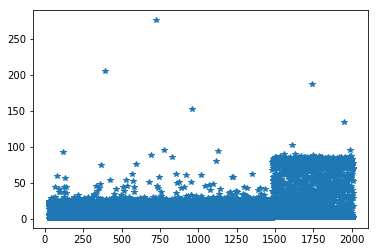

In [10]:
plt.plot(size_1,time_1,'*')

La  durée  d'envoi des données ne semble pas  linéairement dépendante de  la taille. On voit un seuil  aux alentours de  1500  octets,  à partir duquel  le temps d'envoi des données augmente brutalement. On sépare  les données en deux et on effectue une régression linéaire sur les deux jeux parties  séparées

In [11]:
ind_low=size_1<1500
ind_high=size_1>=1500

size_low=size_1[ind_low]
size_high=size_1[ind_high]

time_low=time_1[ind_low]
time_high=time_1[ind_high]

reg_low = LinearRegression()  # create object for the class
reg_low.fit(size_low.values.reshape(-1,1), time_low.values.reshape(-1,1))  # perform linear regression

time_low_reg = reg_low.predict(size_low.values.reshape(-1,1))  # make predictions

reg_high = LinearRegression()  # create object for the class
reg_high.fit(size_high.values.reshape(-1,1), time_high.values.reshape(-1,1))  # perform linear regression

time_high_reg = reg_high.predict(size_high.values.reshape(-1,1))  # make predictions

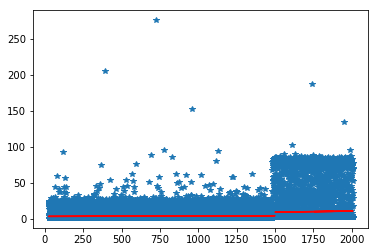

In [12]:
plt.plot(size_1,time_1,'*',size_low.values.reshape(-1,1),time_low_reg,'r',size_high.values.reshape(-1,1),time_high_reg,'r')

In [13]:
C_low=1/reg_low.coef_
C_low

array([[1620.05083396]])

In [14]:
L_low=reg_low.intercept_
L_low

array([3.12808083])

In [15]:
C_high=1/reg_high.coef_
C_high

array([[349.48639641]])

In [16]:
L_high=reg_high.intercept_
L_high

array([4.77022699])

La latence semble concorder dans les deux catégories (3 à 5  secondesn selon la taille des fichiers). Le coefficient linéaire passe de 350 à 1600 selon la catégorie, montrant les limites du modèle  linéaire dans ce cas.

We  now perform the same operations with the second set  of data

###  Data set 2

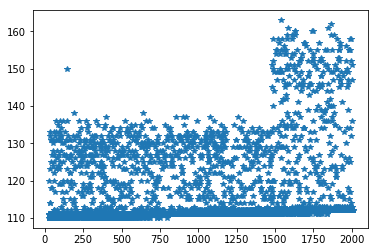

In [24]:
with gzip.open(data_file_2_gz) as f:
    file_content = f.read()
f = open("data_file_2.txt", "w")
f.write(file_content.decode("utf-8") )
f.close()

raw_data_2 = pd.read_csv("data_file_2.txt",sep=' ',header=None)


data_2 = raw_data_2.dropna().copy()

size_2=data_2[1]

time_2_str=data_2[8]
time_2 = pd.Series(time_2_str)
time_2=time_2.str.replace('^[^\d]*', '').astype(float)

date_2_str=data_1[0]
def find_number(text):
    num = re.findall(r'[0-9]+',text)
    return ".".join(num)
date_2=date_2_str.apply(lambda x: find_number(x))

plt.plot(size_2,time_2,'*')

La même limite de 1500 octets  est trouvée avec ce jeu de données

In [25]:
ind_low=size_2<1500
ind_high=size_2>=1500

size_low=size_2[ind_low]
size_high=size_2[ind_high]

time_low=time_2[ind_low]
time_high=time_2[ind_high]

reg_low = LinearRegression()  # create object for the class
reg_low.fit(size_low.values.reshape(-1,1), time_low.values.reshape(-1,1))  # perform linear regression

time_low_reg = reg_low.predict(size_low.values.reshape(-1,1))  # make predictions

reg_high = LinearRegression()  # create object for the class
reg_high.fit(size_high.values.reshape(-1,1), time_high.values.reshape(-1,1))  # perform linear regression

time_high_reg = reg_high.predict(size_high.values.reshape(-1,1))  # make predictions

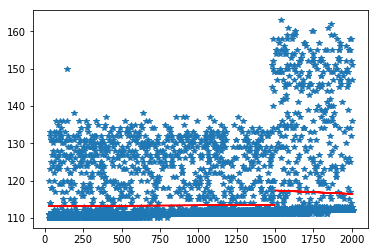

In [27]:
plt.plot(size_2,time_2,'*',size_low.values.reshape(-1,1),time_low_reg,'r',size_high.values.reshape(-1,1),time_high_reg,'r')

In [28]:
C_low=1/reg_low.coef_
C_low

array([[3773.18876229]])

In [30]:
L_low=reg_low.intercept_
L_low

array([113.11755777])

In [31]:
C_high=1/reg_high.coef_
C_high

array([[-543.43256079]])

In [32]:
L_high=reg_high.intercept_
L_high

array([120.12342616])

Cette  connexion semble avoir une latence plus élevée, de  l'ordre de 100ms. Le coefficient change drastiquement selon la taille des données, et est même négatif  pour les données de taille importantes.